# WINE REGRESSION - SOLUTION

In [1]:
# Activate inline plots.
%matplotlib inline

# Useful imports for the exercises.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

## EXERCISE 1

The goal of this exercise is to experiment with various regression methods.

We would like to build an automatic system for rating red wines.
The file `data/winequality-red.csv` contains a table of 1599 red wines [1], rated by `quality` based on 11 chemical indicators.  

Input variables (based on physicochemical tests):
```
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
```
Output variable (based on sensory data): 
```
   12 - quality (score between 0 and 10)
```

Divide the data in a test and a training set, and use a regression method of your chioce to predict the wine quality from its chemical properties.

[1] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
    *Modeling wine preferences by data mining from physicochemical properties.*
    In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.


In [2]:
# Read the data and print some summary information.
df = pd.read_table('data/wine_quality-red.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [4]:
# List of column names containing all the features for regression.
features = df.columns.difference(['quality'])
# The name of the column for the output varaible.
target = 'quality'
print 'Features:', features.values

Features: ['alcohol' 'chlorides' 'citric acid' 'density' 'fixed acidity'
 'free sulfur dioxide' 'pH' 'residual sugar' 'sulphates'
 'total sulfur dioxide' 'volatile acidity']


In [5]:
from sklearn.cross_validation import train_test_split

x = df[features]
t = np.squeeze(df[target])

# Divide the data into a training and a test set.
random_state = 0  # Fixed so that everybody has got the same split
test_set_fraction = 0.2
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=test_set_fraction, 
                                                    random_state=random_state)

print 'Size of training set:', len(x_train)
print 'Size of test set:', len(x_test)


Size of training set: 1279
Size of test set: 320


First of all, we give a look at the distribution of the output variable.

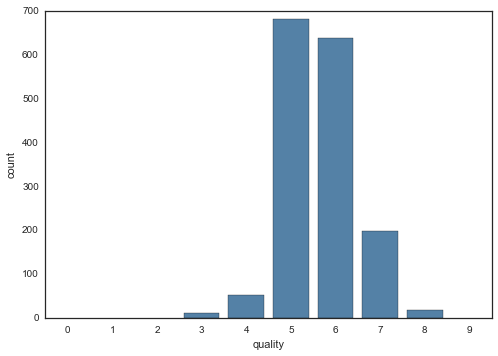

In [6]:
sns.countplot(target, data=df, color='steelblue', order=range(10));

There is an over-abundance of wines that have been judged to be mediocre (5 or 6). Algorithms will tend to become really precise at getting those cases right, at the expense of mis-judging wines that really good or really bad.

Possible solutions:

1. Over/undersample data;
2. Group "excellent" (7, 8) and "horrible" (3, 4) wines together;
3. Remove the extrema (3, 8) and build an outlier detector for those wines;
4. Turn this into a classification problem with three classes.

Next, we would like to see the distribution of the feature variables.

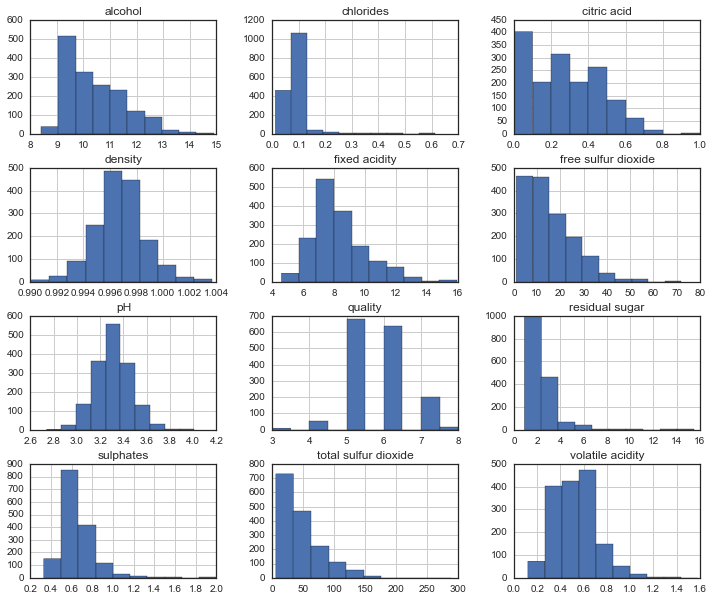

In [7]:
df.hist();
plt.gcf().set_size_inches(12, 10)

The variables have very different ranges, and several of them are non-gaussian. That might compromise the performance of the regression algorithms (depending on the algorithm).

Possible solutions: Normalize all variables; Transform non-gaussian variables using a non-linear transform.

In [8]:
# Transform non-gaussian variables using a log transform.
cols = ['alcohol', 'chlorides', 'citric acid', 'free sulfur dioxide', 'residual sugar', 'total sulfur dioxide']
df[cols] = df[cols].apply(lambda x: np.log(x + 0.1))

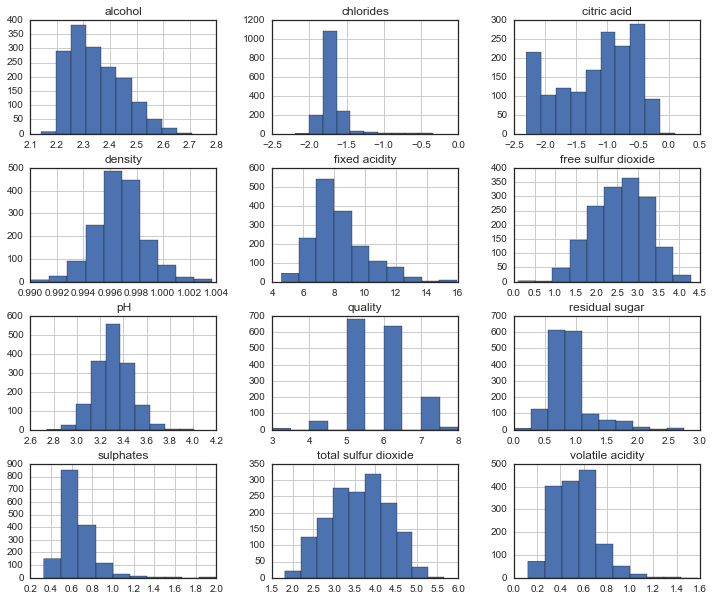

In [9]:
df.hist();
plt.gcf().set_size_inches(12, 10)

Finally, we have a look to see if there is any strong correlation between feature variables.

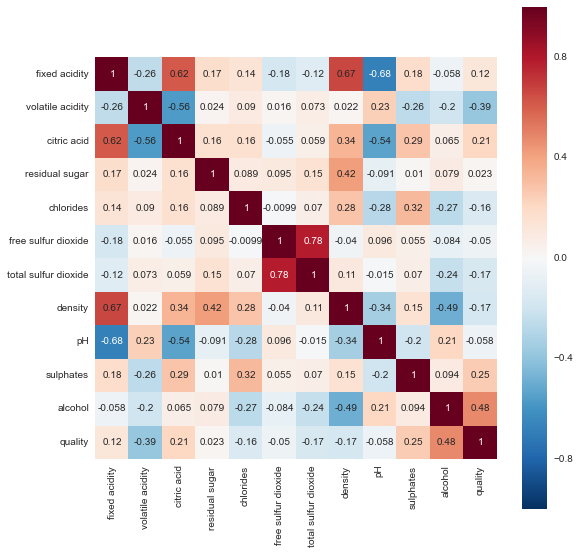

In [28]:
axes = sns.heatmap(df.corr(), annot=True, square=True)

axes.figure.set_size_inches(9, 9)

A few variables have high correlation, but overall it's not too bad.

Possible improvement: Select the most explanatory variable in a group of correlated variables; de-correlate using PCA.

Now we're ready to put together our regression workflow. Let's start by rescaling the data set so that all variables have the same range.

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_test = scaler.transform(x_test)
x_train = scaler.transform(x_train)

## Examples of regression using linear models

In [12]:
from sklearn import linear_model
method = linear_model.Ridge(alpha=0.1)
#method = linear_model.Lasso(alpha=0.02)  # This is a way of doing feature selection
#method = linear_model.Lasso(alpha=0.001)

In [13]:
method.fit(x_train, t_train)
y_test = method.predict(x_test)
print 'Training R^2 = {:.4f}'.format(method.score(x_train, t_train))
print '    Test R^2 = {:.4f}'.format(method.score(x_test, t_test))

Training R^2 = 0.3655
    Test R^2 = 0.3284


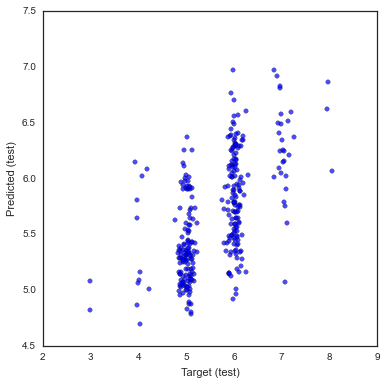

In [14]:
# Ideally, target and prediction should fall on a diagonal line.
def plot_target_vs_prediction(t_test, y_test):
    x = t_test + np.random.randn(*t_test.shape) * 0.1
    plt.scatter(x, y_test, alpha=0.7)
    plt.xlabel('Target (test)')
    plt.ylabel('Predicted (test)')
    plt.gcf().set_size_inches(6, 6)
    
plot_target_vs_prediction(t_test, y_test)

(-3.5, 3.5)

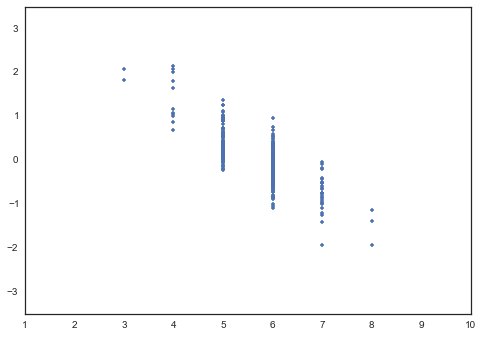

In [15]:
# The residuals should be centered at 0, and be approx. normally distributed.
# The distribution of residual in this case demonstrates the effect of
# the unbalanced data set on the extreme values.
plt.plot(t_test, y_test - t_test, '.')
plt.xlim(1, 10)
plt.ylim(-3.5, 3.5)

In [16]:
zip(features, method.coef_)

[('alcohol', 0.28407222249904607),
 ('chlorides', -0.089513982665956407),
 ('citric acid', -0.034751139118653497),
 ('density', -0.059322497522339909),
 ('fixed acidity', 0.071591132915024142),
 ('free sulfur dioxide', 0.028216549947070658),
 ('pH', -0.039152826990858869),
 ('residual sugar', 0.040467472464178603),
 ('sulphates', 0.1614914056158101),
 ('total sulfur dioxide', -0.093239244091896281),
 ('volatile acidity', -0.20973280310970557)]

## Using decision trees

In [17]:
from sklearn import tree
method = tree.DecisionTreeRegressor(max_depth=5)

from sklearn import ensemble
method = ensemble.ExtraTreesRegressor(n_estimators=100, bootstrap=True, max_depth=15)

In [18]:
method.fit(x_train, t_train)
y_test = method.predict(x_test)
print 'Training R^2 = {:.4f}'.format(method.score(x_train, t_train))
print '    Test R^2 = {:.4f}'.format(method.score(x_test, t_test))

Training R^2 = 0.9110
    Test R^2 = 0.4392


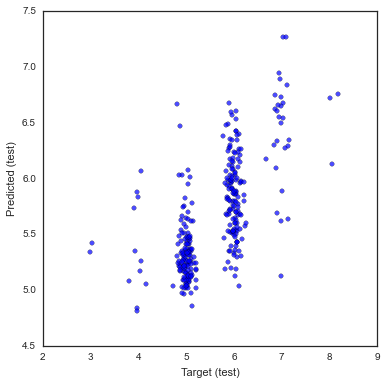

In [19]:
plot_target_vs_prediction(t_test, y_test)

## Using a non-linear basis

In [20]:
from sklearn import svm

# Setting C and gamma correctly is important *and* tricky
method = svm.SVR(kernel='rbf', gamma=0.05, C=10)
#method = svm.SVR(kernel='poly', degree=2, max_iter=500000, C=100.0, coef0=1.0)
#method = svm.SVR(kernel='poly', degree=3, max_iter=500000, C=1.0, coef0=1.0)

In [21]:
method.fit(x_train, t_train)
y_test = method.predict(x_test)
print 'Training R^2 = {:.4f}'.format(method.score(x_train, t_train))
print '    Test R^2 = {:.4f}'.format(method.score(x_test, t_test))

Training R^2 = 0.6183
    Test R^2 = 0.2613


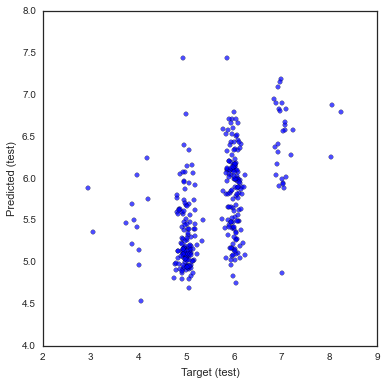

In [22]:
plot_target_vs_prediction(t_test, y_test)

By manually adapting the parameters, the best test error I could reach was 0.44 for the ExtraTreesRegressor.